# Preprocessing

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
header = [
    "id",
    "age",
    "gender",
    "education",
    "country",
    "ethnicity",
    "neuroticism",
    "extraversion",
    "openness",
    "agreeableness",
    "conscientiousness",
    "impulsiveness",
    "sensation_seeking",
    "alcohol",
    "amphet",
    "amyl",
    "benzos",
    "caff",
    "cannabis",
    "choc",
    "coke",
    "crack",
    "ecstasy",
    "heroin",
    "ketamine",
    "legallh",
    "lsd",
    "meth",
    "mushroom",
    "nicotine",
    "semer",
    "vsa",
]

df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data",
    names=header,
)
df

,id,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,...,ecstasy,heroin,ketamine,legallh,lsd,meth,mushroom,nicotine,semer,vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


Retirons tout d'abord les personnes ayant répondu qu'ils avaient consommé la drogue fictive Semeron, cette drogue fictive ayant été rajouté dans le but de repérer les participants qui mentiraient sur leur consommation réelle.

In [3]:
semer_consummer_index = df.loc[df["semer"] != "CL0"].index
print(f"Nombre de personnes ayant indiqué avoir consommé la drogue fictive : {semer_consummer_index.size}"
)

df.drop(index=semer_consummer_index, inplace=True)

Nombre de personnes ayant indiqué avoir consommé la drogue fictive :  8


On retire maintenant la feature "id" n'étant d'aucune utilité ainsi que "ethnicity" pour des raisons d'éthique et l'on ne conserve que la consommation de canabis.

In [4]:
df_cannabis = df.loc[
    :,
    [
        "age",
        "gender",
        "education",
        "country",
        "neuroticism",
        "extraversion",
        "openness",
        "agreeableness",
        "conscientiousness",
        "impulsiveness",
        "sensation_seeking",
        "cannabis",
    ],
]

df_cannabis

,age,gender,education,country,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking,cannabis
0,0.49788,0.48246,-0.05921,0.96082,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL4
2,0.49788,-0.48246,-0.05921,0.96082,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL3
3,-0.95197,0.48246,1.16365,0.96082,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL2
4,0.49788,0.48246,1.98437,0.96082,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL3
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL3
1882,-0.07854,0.48246,0.45468,-0.57009,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL6
1883,-0.95197,0.48246,-0.61113,-0.57009,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL6


On remplace les différents niveaux de consommation de canabis par des -1 et des 1. La valeur -1 correspondant aux non-consommateurs et la valeur 1 correspondant aux consommateurs. Comme mentionné dans l'introduction, nous avons décidé de considérer comme consommatrice une personne ayant consommé du canabis durant la dernière année.

In [ ]:
def CL_to_binary(cl):
    return -1 if cl == "CL0" or cl == "CL1" or cl == "CL2" else 1

In [5]:
cannabis_consumption = df_cannabis["cannabis"].tolist()
df_cannabis.loc[:, "cannabis"] = list(map(CL_to_binary, cannabis_consumption))
canabis_consumers = df_cannabis["cannabis"].value_counts()

print(f"Nombre de consomateurs : {canabis_consumers[1]}")
print(f"Nombre de non-consomateurs : {canabis_consumers[-1]}")

,age,gender,education,country,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking,cannabis
0,0.49788,0.48246,-0.05921,0.96082,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,-1
1,-0.07854,-0.48246,1.98437,0.96082,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,0.49788,-0.48246,-0.05921,0.96082,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1
3,-0.95197,0.48246,1.16365,0.96082,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,-1
4,0.49788,0.48246,1.98437,0.96082,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1
1882,-0.07854,0.48246,0.45468,-0.57009,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1
1883,-0.95197,0.48246,-0.61113,-0.57009,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1


On renomme les valeurs des colonnes *age*, *gender*, *education* et *country* afin de rendre plus lisible les noms des colonnes

In [6]:
age = {
    -0.95197: "18-24",
    -0.07854: "25-34",
    0.49788: "35-44",
    1.09449: "45-54",
    1.82213: "55-64",
    2.59171: "65+",
}
gender = {-0.48246: "male", 0.48246: "female"}
education = {
    -2.43591: "left school before 16",
    -1.7379: "left school at 16",
    -1.43719: "left school at 17",
    -1.22751: "left school at 18",
    -0.61113: "left college without degree",
    -0.05921: "professionnal certificate",
    0.45468: "university degree",
    1.16365: "master degree",
    1.98437: "doctorate degree",
}
country = {
    -0.57009: "USA",
    -0.46841: "New Zealand",
    -0.28519: "Other",
    -0.09765: "Australia",
    0.21128: "Republic of Ireland",
    0.24923: "Canada",
    0.96082: "UK",
}

def rename_age(x):
    return age[x]

def rename_gender(x):
    return gender[x]

def rename_education(x):
    return education[x]

def rename_country(x):
    return country[x]

df_cannabis["age"] = df_cannabis.loc[:, "age"].apply(rename_age)
df_cannabis["gender"] = df_cannabis.loc[:, "gender"].apply(rename_gender)
df_cannabis["education"] = df_cannabis.loc[:, "education"].apply(rename_education)
df_cannabis["country"] = df_cannabis.loc[:, "country"].apply(rename_country)

del age
del gender
del education
del country

df_cannabis

,age,gender,education,country,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking,cannabis
0,35-44,female,professionnal certificate,UK,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,-1
1,25-34,male,doctorate degree,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,35-44,male,professionnal certificate,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1
3,18-24,female,master degree,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,-1
4,35-44,female,doctorate degree,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,18-24,female,left college without degree,USA,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1
1881,18-24,male,left college without degree,USA,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1
1882,25-34,female,university degree,USA,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1
1883,18-24,female,left college without degree,USA,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1


Comme nous l'avons remarqué lors de la visualisation des données, certaines features possèdes des valeurs largement sous-représentées comparé à d'autres. Le pays d'origine est un bon exemple avec une écrasante majorité d'individus vivant aux USA ou au UK, comparé à ceux vivant en Nouvelle-Zélande

Dans ce genre de cas, le modèle allant potentiellement avoir du mal à apprendre, nous avons décidé de fusionner certaines valeurs dans l'optique de rééquilibrer certaines features.

In [ ]:
categorical_features = ["age", "country", "education", "gender"]
for feature in categorical_features:
    print(df_cannabis[feature].value_counts().to_string(), end="\n\n")

country
UK                     1044
USA                     551
Other                   118
Canada                   87
Australia                52
Republic of Ireland      20
New Zealand               5
Name: count, dtype: int64
education
left college without degree    503
university degree              478
master degree                  283
professionnal certificate      270
left school at 18               99
left school at 16               98
doctorate degree                89
left school at 17               29
left school before 16           28
Name: count, dtype: int64
age
18-24    637
25-34    480
35-44    355
45-54    294
55-64     93
65+       18
Name: count, dtype: int64
gender
male      940
female    937
Name: count, dtype: int64


On procède en les fusionant avec d'autres classes comme suit :

In [8]:
# Merging 45-54, 55-64 and 65+ as 45+
df_cannabis["age"] = df_cannabis["age"].replace(["45-54", "55-64", "65+"], "45+")

# Merging Other with Canada, Australia, New Zealand, and Republic of Ireland
df_cannabis["country"] = df_cannabis["country"].replace(
    ["Other", "Canada", "Australia", "New Zealand", "Republic of Ireland"], "Other"
)

# Merging left school at 18 with at 17, 16 and before 16
df_cannabis["education"] = df_cannabis["education"].replace(
    [
        "left school at 18",
        "left school at 16",
        "left school at 17",
        "left school before 16",
    ],
    "left school before 18 (included)",
)

for feature in categorical_features[:-1]:
    print(df_cannabis[feature].value_counts().to_string(), end="\n\n")

country
UK       1044
USA       551
Other     282
Name: count, dtype: int64
education
left college without degree         503
university degree                   478
master degree                       283
professionnal certificate           270
left school before 18 (included)    254
doctorate degree                     89
Name: count, dtype: int64
age
18-24    637
25-34    480
45+      405
35-44    355
Name: count, dtype: int64


Les colonnes catégoriques *age*, *gender*, *education* et *country* ayant été numérisé entre -1 et 1, nous avons décidé de les encoder en one-hot afin de retirer la notion de distance associé à leur ancienne représentation. Nous avions d'abord pensé ne le faire que *gender* et *country* mais après plusieurs tests, nous avons finalement opté d'inclure *age* ainsi que *education*. Pour ces deux dernières features, nous pensions d'abord que conserver cet ordre pourrait s'avérer utile cependant, après quelques tests, nous nous sommes rendu compte que nos models performaient mieux après encodage en one-hot.

In [9]:
# On encore les features catégoriques en one-hot
one_hot = OneHotEncoder(handle_unknown="ignore")
one_hot.fit(df_cannabis[categorical_features])

df_cannabis_encoded = pd.DataFrame(
    one_hot.transform(df_cannabis[categorical_features]).toarray(),
    columns=one_hot.get_feature_names_out(),
)
# On met à jour les index car on avait supprimé certaine lignes
df_cannabis_encoded.index = df_cannabis.index

# On combine les features encodé en one-hot avec les features numériques
X = pd.concat(
    [df_cannabis.drop(categorical_features, axis=1), df_cannabis_encoded], axis=1
).drop("cannabis", axis=1)
y = df_cannabis["cannabis"]

In [10]:
X.columns

Index(['neuroticism', 'extraversion', 'openness', 'agreeableness',
       'conscientiousness', 'impulsiveness', 'sensation_seeking', 'age_18-24',
       'age_25-34', 'age_35-44', 'age_45+', 'gender_female', 'gender_male',
       'education_doctorate degree', 'education_left college without degree',
       'education_left school before 18 (included)', 'education_master degree',
       'education_professionnal certificate', 'education_university degree',
       'country_Other', 'country_UK', 'country_USA'],
      dtype='object')

Nous finissons cette étape de preprocessing par une PCA à 2 dimensions afin de visualiser la répartition des nouvelles données

In [11]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Variance expliqué par les deux composantes
print(f"Var PC1: {pca.explained_variance_ratio_[0]*100:.3f}%")
print(f"Var PC2: {pca.explained_variance_ratio_[1]*100:.3f}%")

[0.2469749  0.19137147]


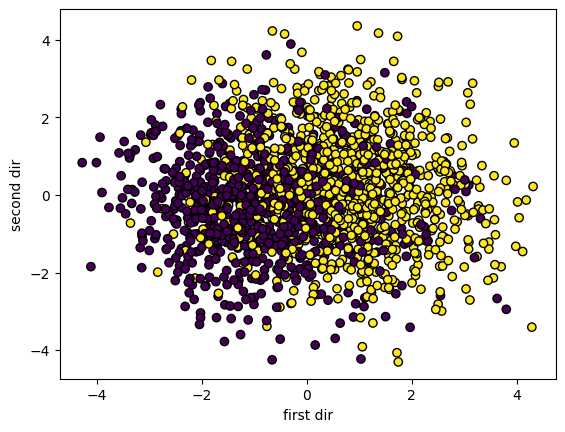

In [12]:
plt.scatter(X_2d[:, 0], X_2d[:, 1], marker="o", c=y, edgecolors="k")
plt.xlabel("first dir")
plt.ylabel("second dir")
plt.show()

# Training

Nous avons choisi de réaliser notre classification binaire avec le cannabis car c'est la drogue pour laquelle le nombre de consommateurs est le plus proche du nombre de non consommateurs. Nous nous sommes donc dit que ce serait plus pratique pour pouvoir avoir un model efficace. 

Séparation des données en train, valid et test

In [13]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_valid, y_train_valid, test_size=0.2, random_state=42
)

Tout d'abord, nous avons regardé les performances que nous pouvions obtenir avec un simple arbre de décision 

Un arbre de décision est un algorithme de classification qui créer un arbre dont chaque noeud sert de pivot pour séparer les données. L'algorithme procède ainsi en créant des noeuds posédant chacun un seuil sur une feature séparant les données en deux sous-ensembles. Avec les hyper paramètres que nous avons utilisé, ce seuil est définie en parcourant toutes les features pour trouver la meilleur séparation, c'est-à-dire, dans le cas de notre classification binaire, le plus de consommateurs et le moins de non-consommateurs d'un côté et inversement de l'autre côté. Après plusieurs itérations, ces noeuds permettent de classer les données dans différentes feuilles où l'ont peut supposer la classe des données dedans.

Nous avons choisi d'utiliser un arbre de décision pour effectuer cette classification car on peut facilement visualiser les différents branchement.  
Nous avons effectuez une séparation du dataset en conservant 20% des données pour le test final et 80% pour l'entrainement et la validation.  

Il faut cependant être vigilant car les arbres de décision ont facilement tendance à overfit.

#### Choix de la métrique

Dans le cadre d'une classification binaire plusieurs métriques sont possibles: precision , accuracy, sensitivity, specitificity.
On note: TP(resp FP) les vrais(resp faux) positifs, TN(resp FN) les vrais(resp faux) négatifs,
$$Sensitivity = TP/(TP+FN)$$ 
et 
$$Specitfity = TN/(TN+FP)$$ 

Dans notre cas, nous avons choisi la balanced accuracy score :
$$Balanced Accuracy = \frac{(Sensitivity + Specificity)}{2}$$  

Ce choix de score s'explique par le fait que, par précaution, même si les données sont équilibrées, il s'avère que cela est la meilleure métrique, au pire si elles sont balancées cela revient au même que d'utiliser l'accuracy score classique.

Une autre métrique intéressante que nous avons utilisé est l'aire sous la courbe ROC. Elle mesure la capacité d'un modèle à classer correctement des exemples positifs et négatifs à travers différents seuils de classification. L'aire sous la courbe ROC (AUC) est un résumé de la performance du modèle sur l'ensemble des seuils possibles. L'AUC varie de 0 à 1, où une valeur de 1 indique une performance parfaite et une valeur de 0,5 représente un modèle aléatoire.

0.8671964679911699


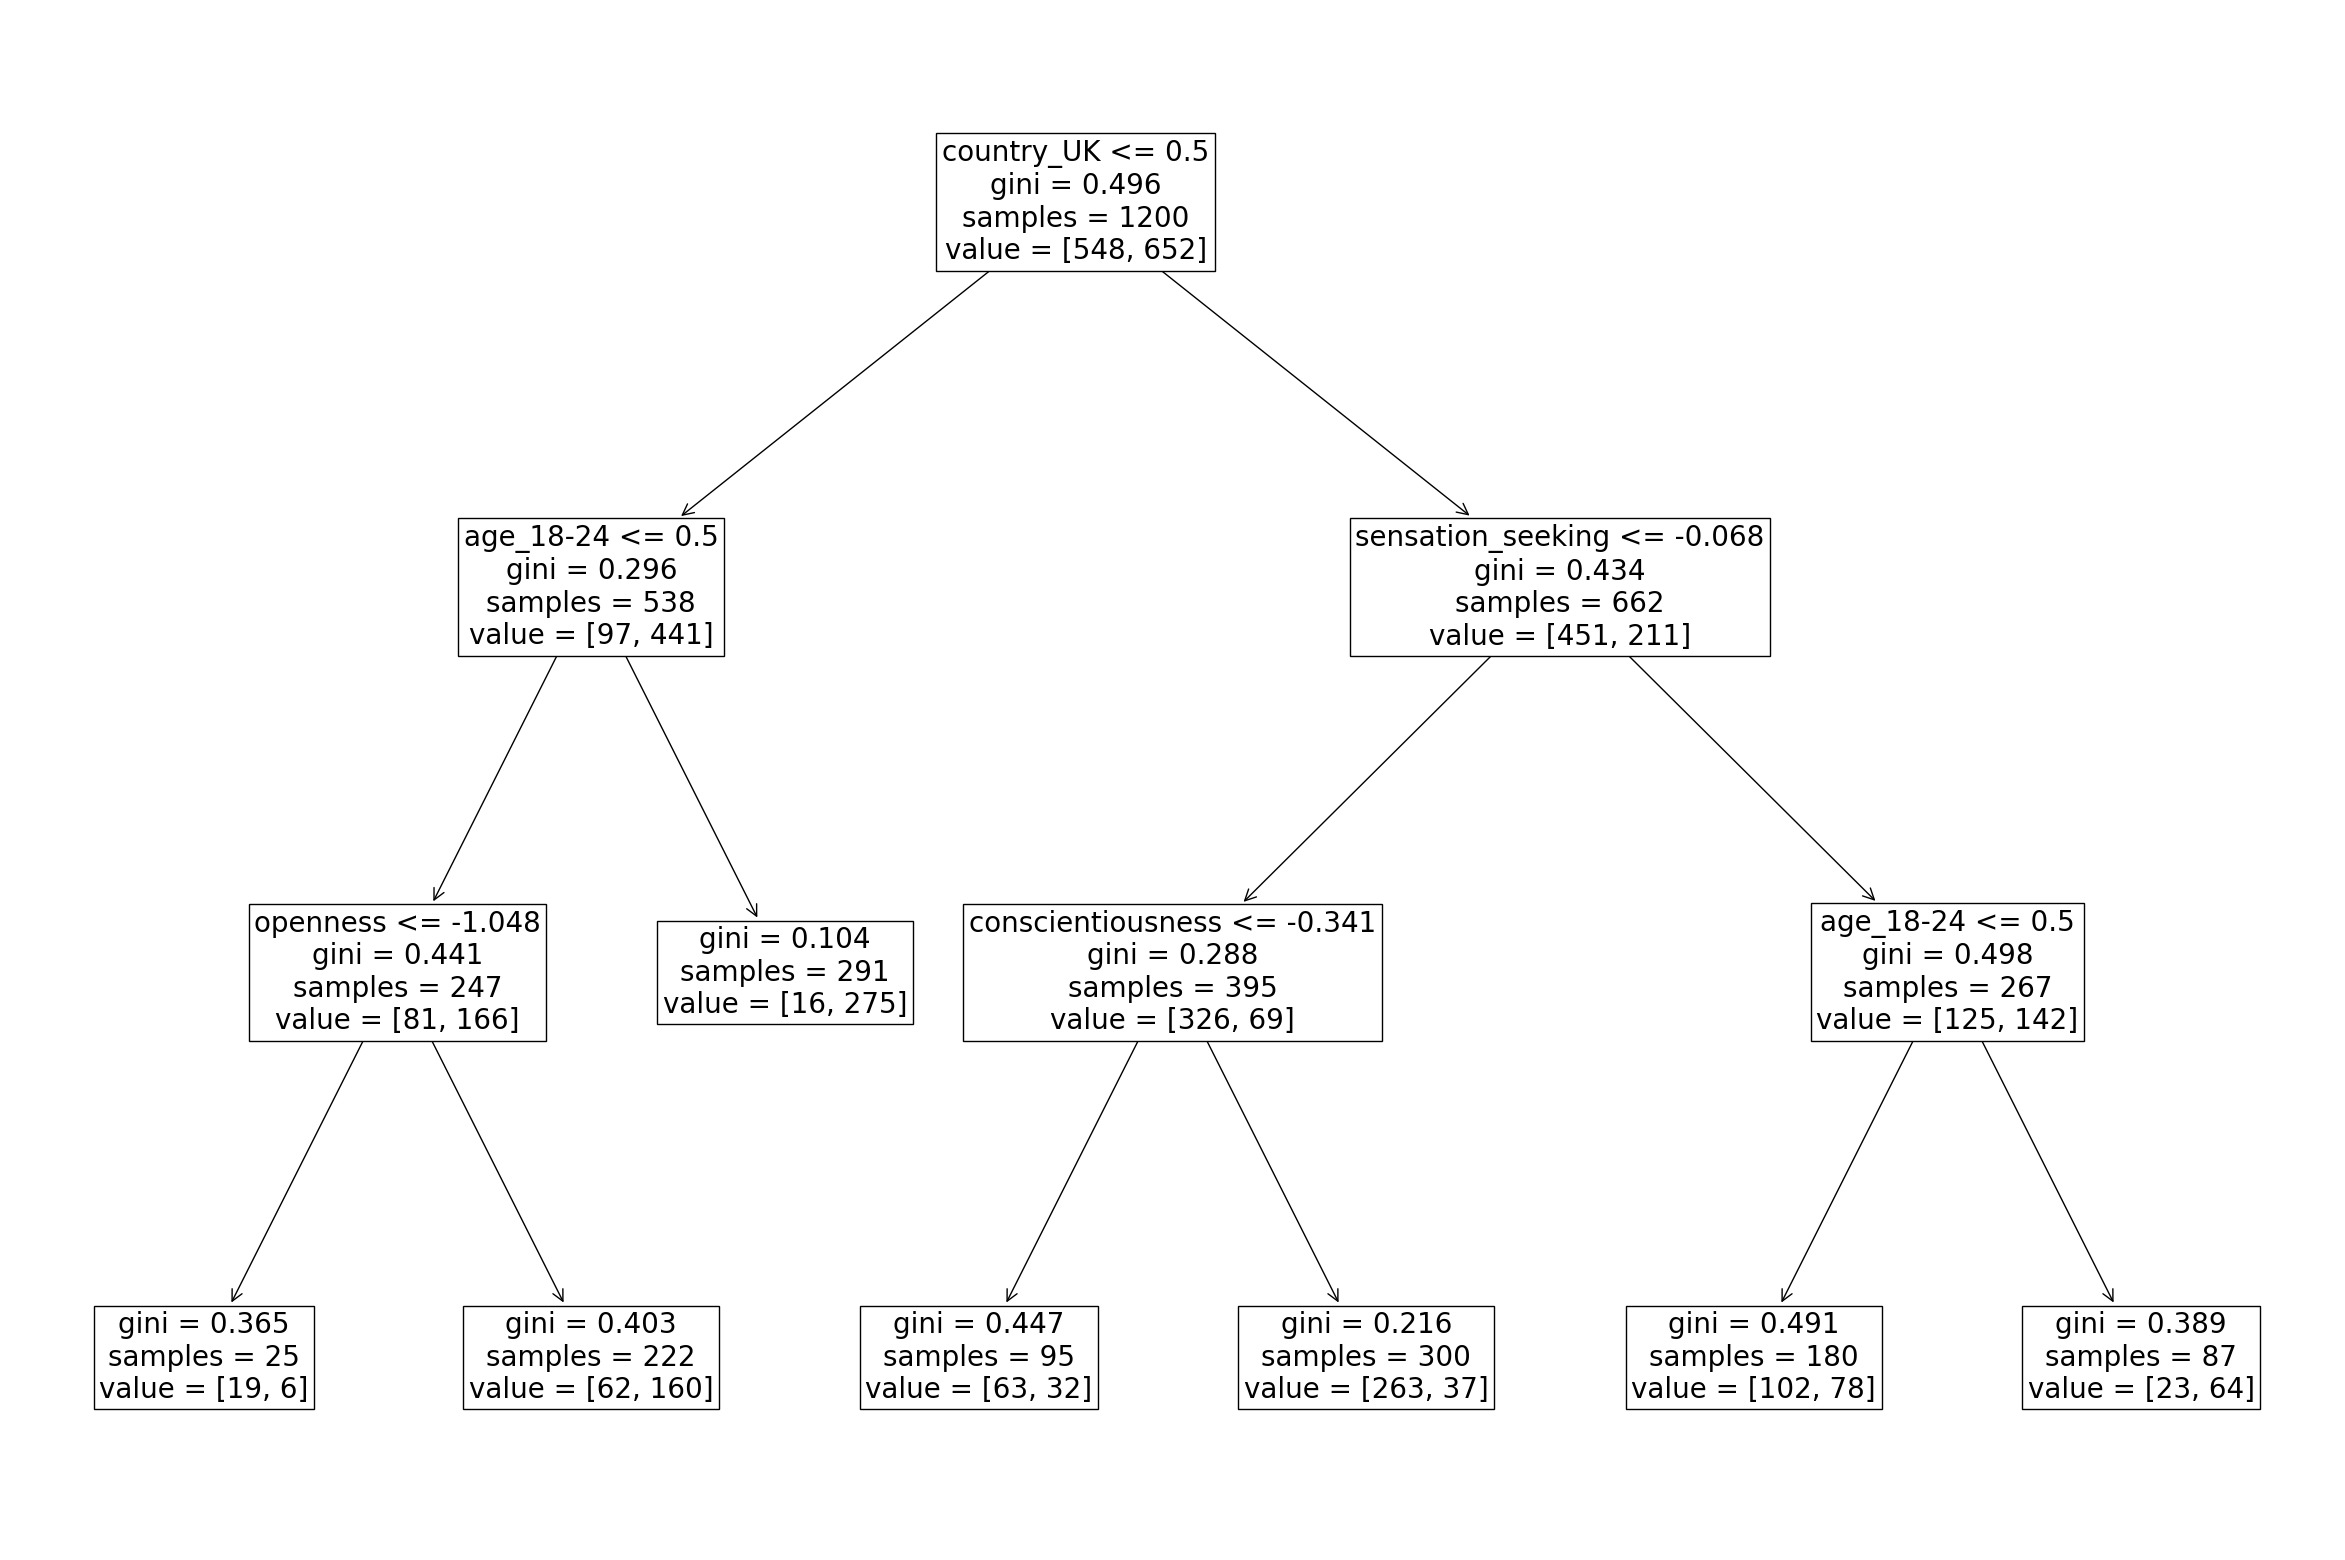

In [15]:
clf = DecisionTreeClassifier(max_leaf_nodes=7, random_state=0)
clf.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(30, 20))
tree.plot_tree(clf, fontsize=20, ax=ax, feature_names=X.columns)
y_pred = clf.predict(X_valid)
print(balanced_accuracy_score(y_valid, y_pred))

In [16]:
score_train = cross_val_score(clf, X_train_valid, y_train_valid, cv=5)
print(score_train.mean(), score_train.std())

0.8021284606866003 0.024755212189674955


Nous allons ensuite fait des tests d'hyper-paramètres avec de la cross-validation pour essayer de trouver quelle manière de limiter la taille de l'arbre est la plus efficace.

### Nombre de feuilles

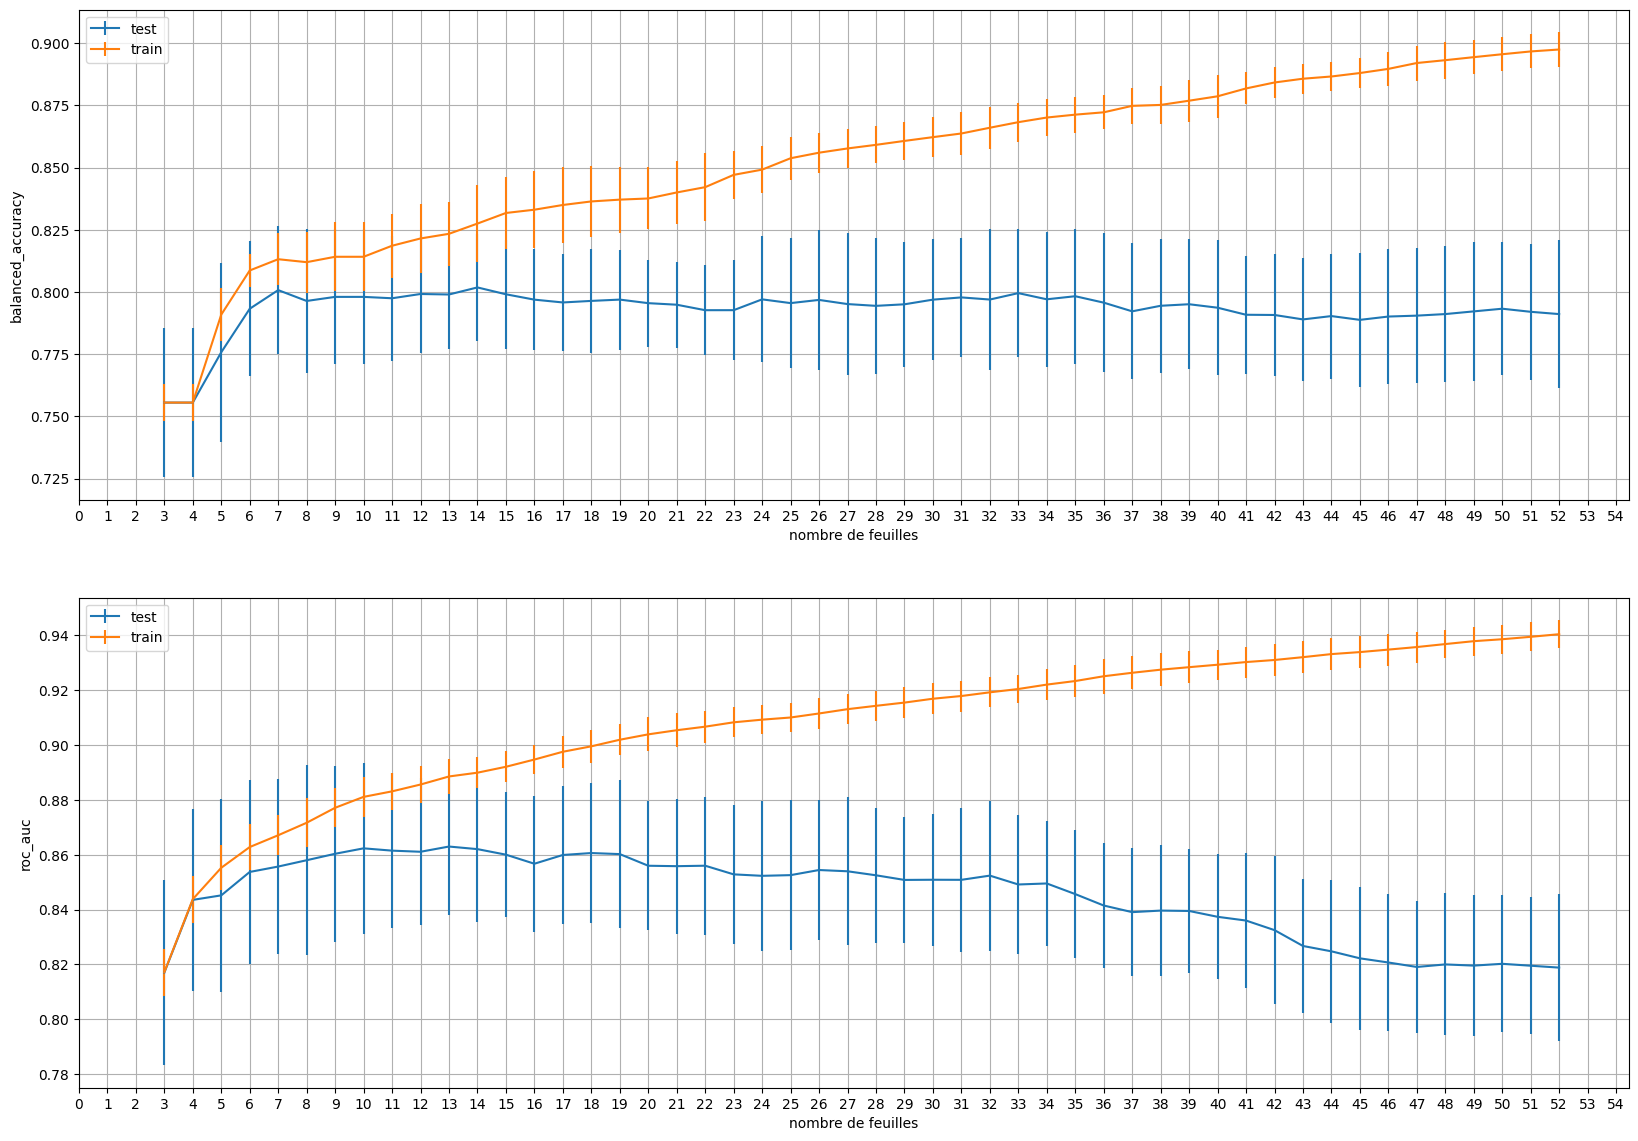

In [17]:
# Teste de l'hyperparamètre : nombre de feuille

nom_param = "nombre de feuilles"
limite_param = 50
scoring = ["balanced_accuracy", "roc_auc"]

means = [np.zeros(limite_param) for i in range(len(scoring) *2)]
stds = [np.zeros(limite_param) for i in range(len(scoring) *2)]

for n in range(limite_param):
    clf = DecisionTreeClassifier(max_leaf_nodes=n+3, random_state=0)
    clf.fit(X_train, y_train)
    result = cross_validate(clf, X_train_valid, y_train_valid, cv=5, n_jobs=-1, scoring = scoring, return_train_score=True)
    for i in range(len(scoring)):
        means[i*2][n] = result["test_" + scoring[i]].mean()
        means[i*2 +1][n] = result["train_" + scoring[i]].mean()
        stds[i*2][n] = result["test_" + scoring[i]].std()
        stds[i*2 +1][n] = result["train_" + scoring[i]].std()

fig, axs = plt.subplots(len(scoring), 1, figsize=(20, 14))

for i in range(len(scoring)):
    axs[i].errorbar(np.array(range(limite_param)) + 3, means[i*2], stds[i*2], label="test")
    axs[i].errorbar(np.array(range(limite_param)) + 3, means[i*2 +1], stds[i*2 +1], label="train")
    axs[i].set_xlabel(nom_param)
    axs[i].set_ylabel(scoring[i])
    axs[i].legend()
    axs[i].grid()
    axs[i].set_xticks(range(0, limite_param+5))

### Profondeur maximale

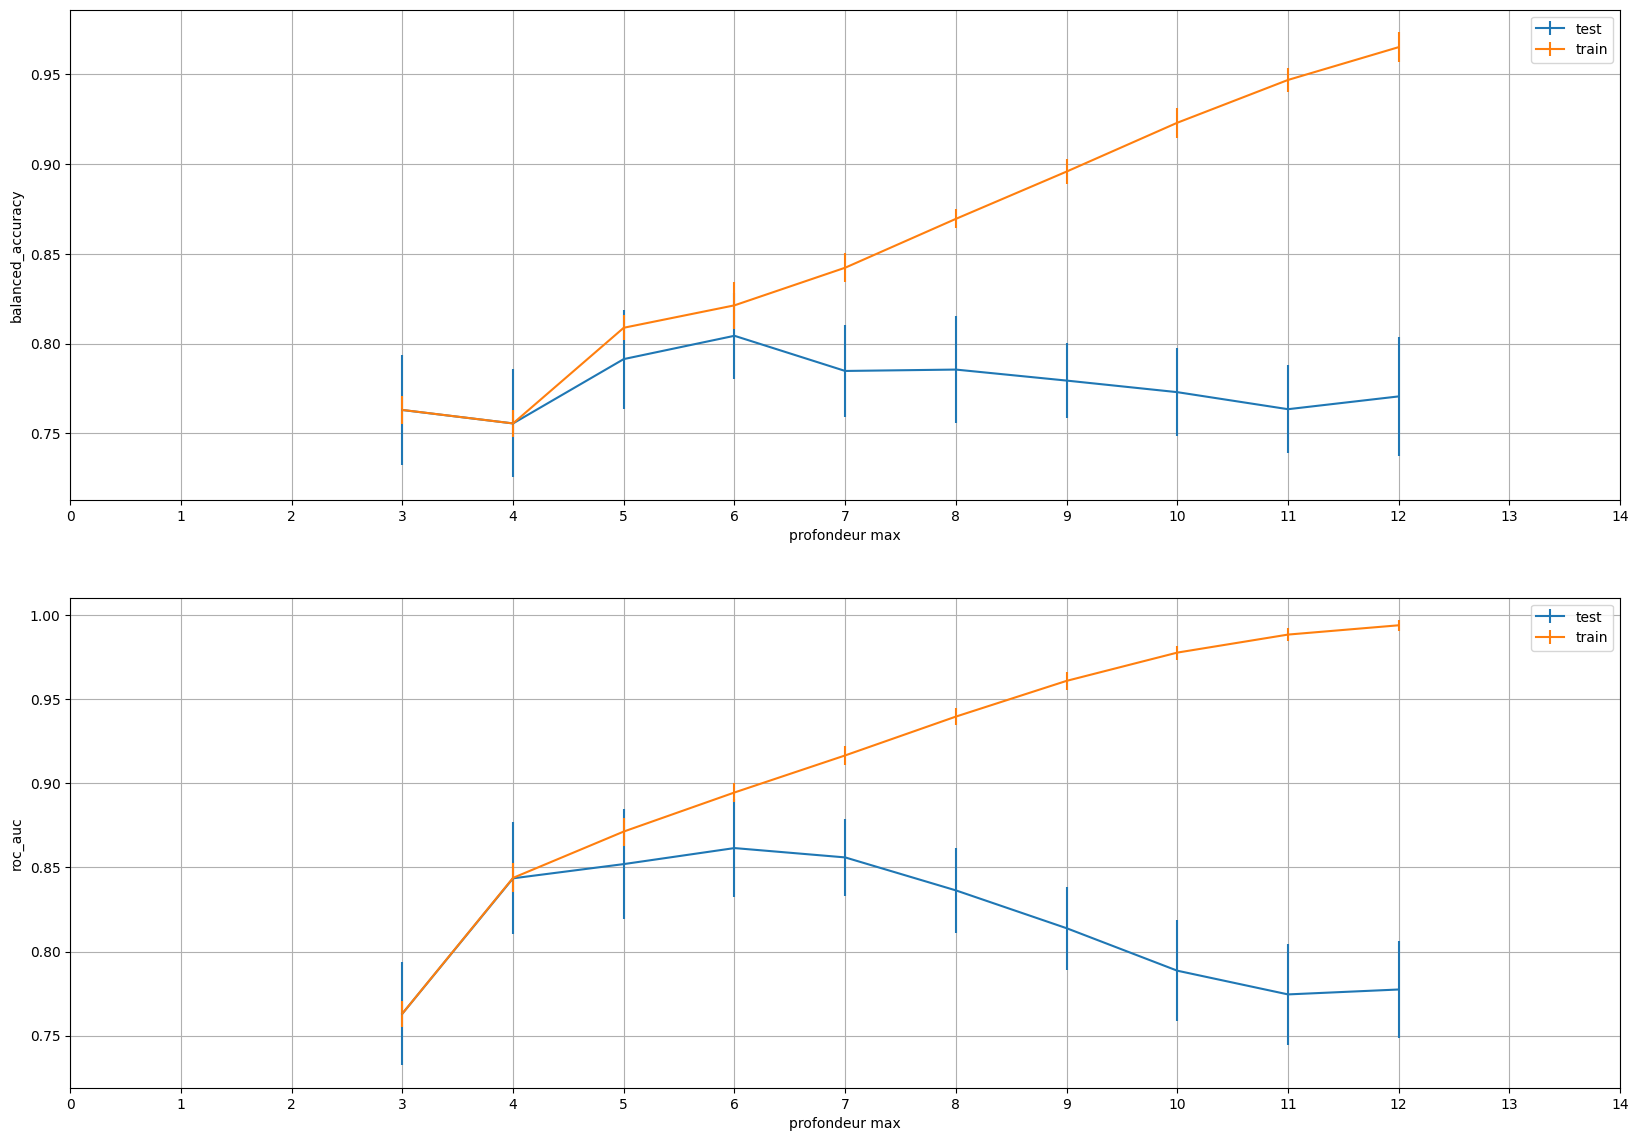

In [18]:
# Teste de l'hyperparamètre : profondeur max
nom_param = "profondeur max"
limite_param = 10
scoring = ["balanced_accuracy", "roc_auc"]

means = [np.zeros(limite_param) for i in range(len(scoring) *2)]
stds = [np.zeros(limite_param) for i in range(len(scoring) *2)]

for n in range(limite_param):
    clf = DecisionTreeClassifier(max_depth=n+1, random_state=0)
    clf.fit(X_train, y_train)
    result = cross_validate(clf, X_train_valid, y_train_valid, cv=5, n_jobs=-1, scoring = scoring, return_train_score=True)
    for i in range(len(scoring)):
        means[i*2][n] = result["test_" + scoring[i]].mean()
        means[i*2 +1][n] = result["train_" + scoring[i]].mean()
        stds[i*2][n] = result["test_" + scoring[i]].std()
        stds[i*2 +1][n] = result["train_" + scoring[i]].std()

fig, axs = plt.subplots(len(scoring), 1, figsize=(20, 14))

for i in range(len(scoring)):
    axs[i].errorbar(np.array(range(limite_param)) + 3, means[i*2], stds[i*2], label="test")
    axs[i].errorbar(np.array(range(limite_param)) + 3, means[i*2 +1], stds[i*2 +1], label="train")
    axs[i].set_xlabel(nom_param)
    axs[i].set_ylabel(scoring[i])
    axs[i].legend()
    axs[i].grid()
    axs[i].set_xticks(range(0, limite_param+5))

### Nombre de sample minimum nécessaire pour effectuer un nouveau branchement

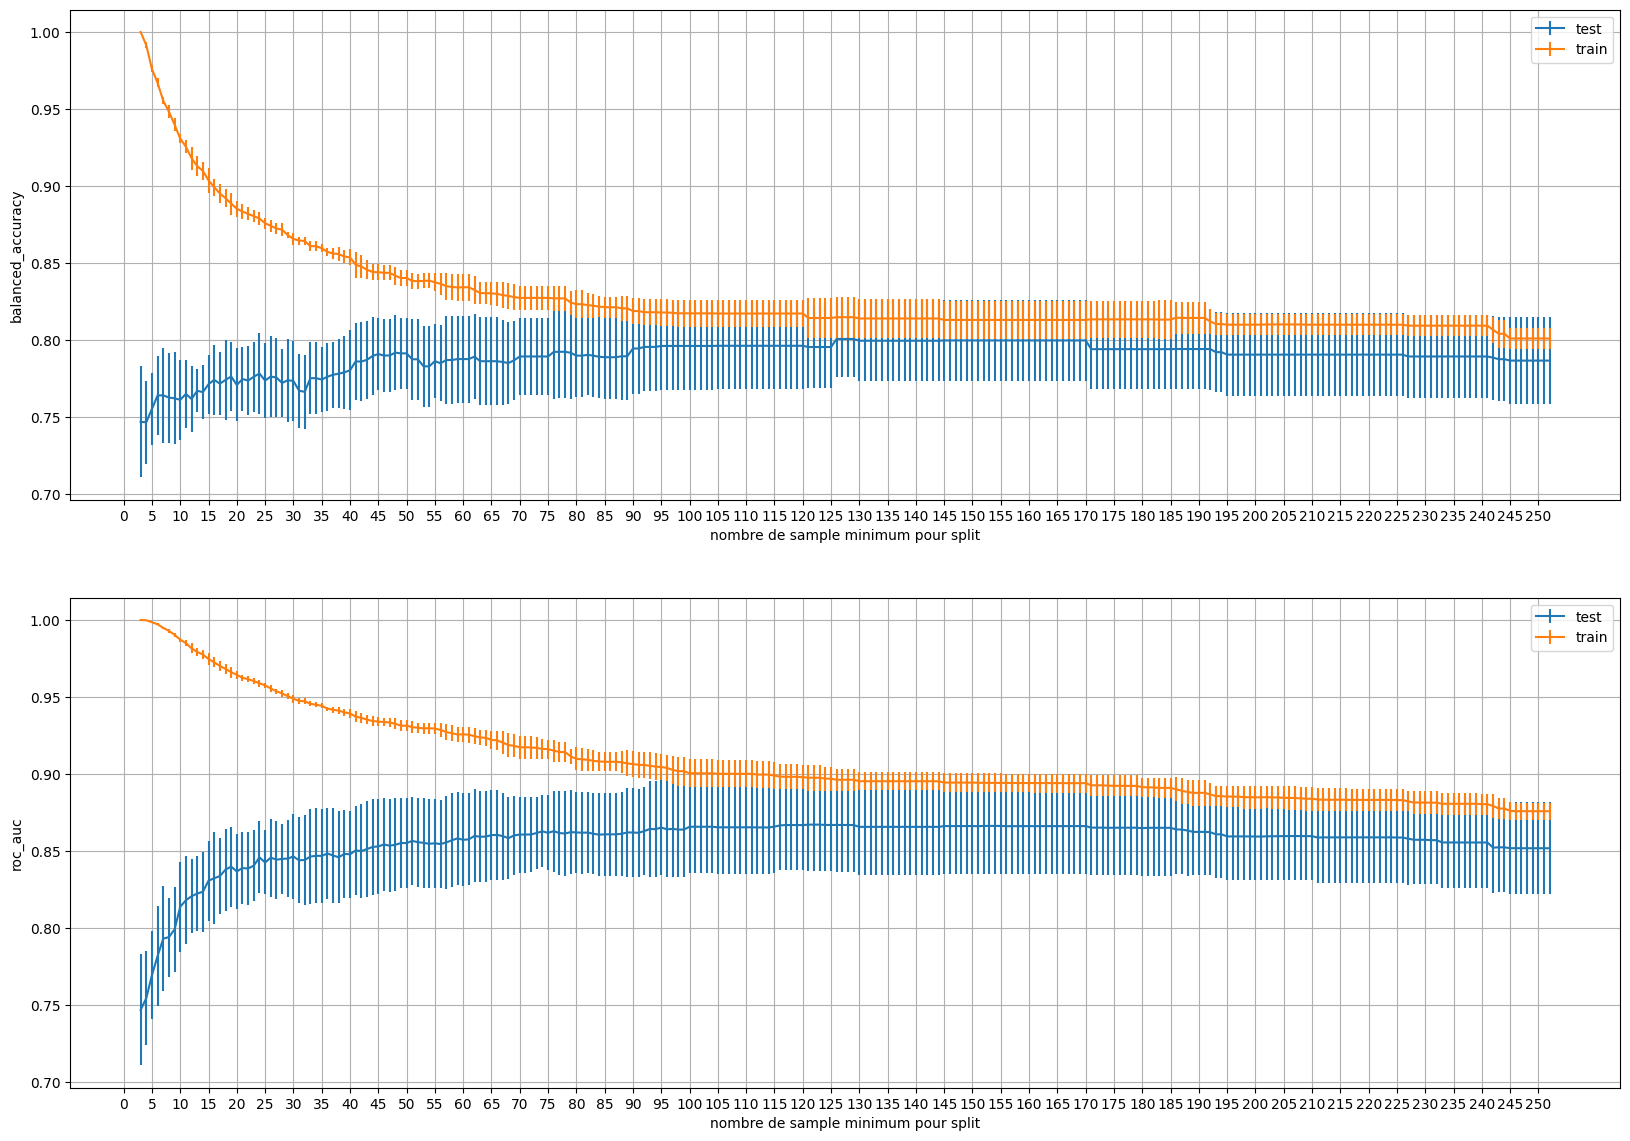

In [19]:
# Teste de l'hyperparamètre : nombre de sample min pour split
nom_param = "nombre de sample minimum pour split"
limite_param = 250
scoring = ["balanced_accuracy", "roc_auc"]

means = [np.zeros(limite_param) for i in range(len(scoring) *2)]
stds = [np.zeros(limite_param) for i in range(len(scoring) *2)]

for n in range(limite_param):
    clf = DecisionTreeClassifier(min_samples_split=n+2, random_state=0)
    clf.fit(X_train, y_train)
    result = cross_validate(clf, X_train_valid, y_train_valid, cv=5, n_jobs=-1, scoring = scoring, return_train_score=True)
    for i in range(len(scoring)):
        means[i*2][n] = result["test_" + scoring[i]].mean()
        means[i*2 +1][n] = result["train_" + scoring[i]].mean()
        stds[i*2][n] = result["test_" + scoring[i]].std()
        stds[i*2 +1][n] = result["train_" + scoring[i]].std()

fig, axs = plt.subplots(len(scoring), 1, figsize=(20, 14))

for i in range(len(scoring)):
    axs[i].errorbar(np.array(range(limite_param)) + 3, means[i*2], stds[i*2], label="test")
    axs[i].errorbar(np.array(range(limite_param)) + 3, means[i*2 +1], stds[i*2 +1], label="train")
    axs[i].set_xlabel(nom_param)
    axs[i].set_ylabel(scoring[i])
    axs[i].legend()
    axs[i].grid()
    axs[i].set_xticks(range(0, limite_param+5, 5))

### Nombre de sample minimum par feuille

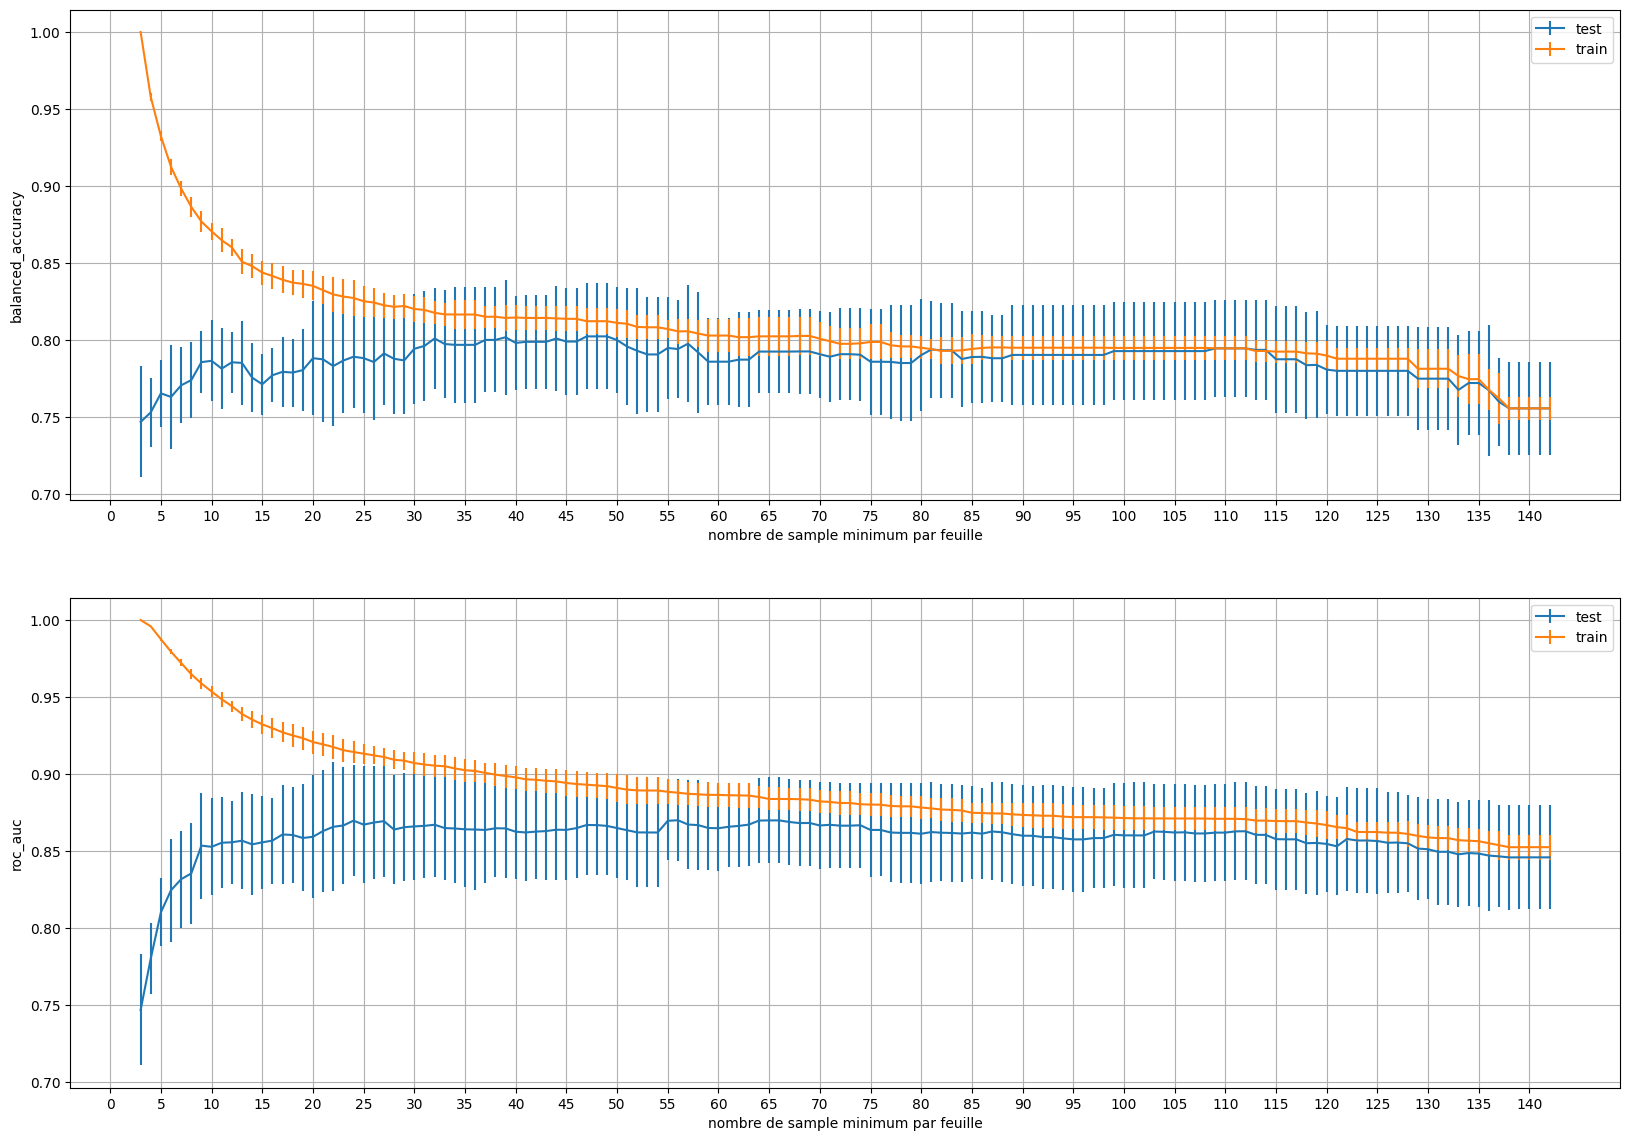

In [20]:
# Teste de l'hyperparamètre : nombre de sample min par feuille
nom_param = "nombre de sample minimum par feuille"
limite_param = 140
scoring = ["balanced_accuracy", "roc_auc"]

means = [np.zeros(limite_param) for i in range(len(scoring) *2)]
stds = [np.zeros(limite_param) for i in range(len(scoring) *2)]

for n in range(limite_param):
    clf = DecisionTreeClassifier(min_samples_leaf=n+1, random_state=0)
    clf.fit(X_train, y_train)
    result = cross_validate(clf, X_train_valid, y_train_valid, cv=5, n_jobs=-1, scoring = scoring, return_train_score=True)
    for i in range(len(scoring)):
        means[i*2][n] = result["test_" + scoring[i]].mean()
        means[i*2 +1][n] = result["train_" + scoring[i]].mean()
        stds[i*2][n] = result["test_" + scoring[i]].std()
        stds[i*2 +1][n] = result["train_" + scoring[i]].std()

fig, axs = plt.subplots(len(scoring), 1, figsize=(20, 14))

for i in range(len(scoring)):
    axs[i].errorbar(np.array(range(limite_param)) + 3, means[i*2], stds[i*2], label="test")
    axs[i].errorbar(np.array(range(limite_param)) + 3, means[i*2 +1], stds[i*2 +1], label="train")
    axs[i].set_xlabel(nom_param)
    axs[i].set_ylabel(scoring[i])
    axs[i].legend()
    axs[i].grid()
    axs[i].set_xticks(range(0, limite_param+5, 5))

Quelque soit le paramètre choisi, on observe que le score de balanced accuracy reste à environ 0.80 et que seul l'overfitting varie.

### Hyper-paramètre PCA et feature map

In [35]:
# Define a pipeline to search for the best combination of PCA truncation
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# Define a polynomial feature map
poly = PolynomialFeatures(2)

# Define the classifier with the best parameter found
clf = DecisionTreeClassifier(max_depth=6, random_state=0)
pipe = Pipeline(steps=[("scaler", scaler), ("poly", poly), ("pca", pca), ("clf", clf)])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {"pca__n_components": [5, 15, 30, 45, 60, 100, 200]}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.719):
{'pca__n_components': 30}


Malheuresement, le score est relativement mauvais. Le test a aussi était fait avec uniquement la feature map sans résultat convaincant.

## Prediction sur X_test

In [21]:
clf = DecisionTreeClassifier(min_samples_leaf=47, random_state=0)
clf.fit(X_train, y_train)
# fig, ax = plt.subplots(figsize=(30, 20))
# tree.plot_tree(clf, fontsize=20, ax = ax, feature_names=X.columns)
y_pred = clf.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

0.7792553191489362


Nous n'avons donc pas réussi à améliorer notre model plus que cela et nous nous sommes demandé si avec un autre modèle nous aurions pu avoir de meilleurs résultats.

Nous remarquons tout de même plusieurs choses par la lecture de l'arbre de décision. Les features qui semblent être intéressantes sont la position géographique, l'âge et la recherche de sensation de l'individu.